# Tarefa: Implementando Regressão Linear do Zero

Aluna: Lorena Santos Pereira

A tarefa consiste em fazer uma implementação com base no vídeo abaixo e depois realizar algumas modificações sobre o algoritmo.
* [How to Do Linear Regression using Gradient Descent](https://www.youtube.com/watch?v=XdM6ER7zTLk)


##  - Implementação base

In [33]:
import numpy as np


def compute_error_for_given_points(b, m, points):
    total_error = 0

    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_error += (y - (m * x + b)) ** 2

    return total_error / float(len(points))


def step_gradient(current_b, current_m, points, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))

    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2 / N) * (y - ((current_m * x) + current_b))
        m_gradient += -(2 / N) * x * (y - ((current_m * x) + current_b))

    # Se o gradiente é negativo queremos aumentar o valor do coeficiente.
    # Se positivo, queremos diminuir. Logo, subtrair a multiplicação entre
    # a taxa de aprendizado e o gradiente dos respectivos valores atuais dos
    # coeficientes garante esse comportamento. Não foi preciso fazer if.
    new_b = current_b - (learning_rate * b_gradient)
    new_m = current_m - (learning_rate * m_gradient)

    return [new_b, new_m]


def gradient_descent_runner(points, learning_rate, starting_b, starting_m, num_iterations):
    b = starting_b
    m = starting_m

    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate)

    return [b, m]

def run():
    points = np.genfromtxt('../datasets/data.csv', delimiter=',')

    learning_rate = 0.0001

    # Coeficiente linear
    initial_b = 0

    # Coeficiente angular
    initial_m = 0

    num_iterations = 1000

    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".
            format(initial_b, initial_m,
            compute_error_for_given_points(initial_b, initial_m, points)))

    print("Running...")

    [b, m] = gradient_descent_runner(points, learning_rate, initial_b, initial_m, num_iterations)

    print("After {0} iterations b = {1}, m = {2}, error = {3}".
            format(num_iterations, b, m,
            compute_error_for_given_points(b, m, points)))

if __name__ == '__main__':
    run()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1000 iterations b = 0.08893651993741346, m = 1.4777440851894448, error = 112.61481011613473


## 1 - Modificando o conjunto de dados para *income.csv*

In [44]:
import numpy as np


def compute_error_for_given_points(b, m, points):
    total_error = 0

    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_error += (y - (m * x + b)) ** 2

    return total_error / float(len(points))

def step_gradient(current_b, current_m, points, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))

    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2 / N) * (y - ((current_m * x) + current_b))
        m_gradient += -(2 / N) * x * (y - ((current_m * x) + current_b))

    new_b = current_b - (learning_rate * b_gradient)
    new_m = current_m - (learning_rate * m_gradient)

    return [new_b, new_m]

def gradient_descent_runner(points, learning_rate, starting_b, starting_m, num_iterations):
    b = starting_b
    m = starting_m

    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate)

    return [b, m]

def run():
    points = np.genfromtxt('../datasets/income.csv', delimiter=',')

    learning_rate = 0.0001

    # Coeficiente linear
    initial_b = 0

    # Coeficiente angular
    initial_m = 0

    num_iterations = 1000

    print("- For dataset income.csv")
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".
            format(initial_b, initial_m,
            compute_error_for_given_points(initial_b, initial_m, points)))

    print("Running...")

    [b, m] = gradient_descent_runner(points, learning_rate, initial_b, initial_m, num_iterations)

    print("After {0} iterations b = {1}, m = {2}, error = {3}".
            format(num_iterations, b, m,
            compute_error_for_given_points(b, m, points)))

if __name__ == '__main__':
    run()
    

- For dataset income.csv
Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...
After 1000 iterations b = -0.18234255376510086, m = 3.262182267596014, error = 103.39842291729676


##  2 - Imprimir o RSS a cada iteração

In [50]:
import numpy as np


def compute_error_for_given_points(b, m, points):
    total_error = 0

    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_error += (y - (m * x + b)) ** 2

    return total_error / float(len(points))

def step_gradient(current_b, current_m, points, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))

    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2 / N) * (y - ((current_m * x) + current_b))
        m_gradient += -(2 / N) * x * (y - ((current_m * x) + current_b))

    new_b = current_b - (learning_rate * b_gradient)
    new_m = current_m - (learning_rate * m_gradient)

    return [new_b, new_m]

def gradient_descent_runner(points, learning_rate, starting_b, starting_m, num_iterations):
    b = starting_b
    m = starting_m
    iterations_rss = []

    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate)
        rss = compute_error_for_given_points(b, m, points)
        print("When iteration = {0} RSS = {1}".format(i, rss))
        iterations_rss.append([int(i), rss])

    np.savetxt("../datasets/iterations_rss.csv", iterations_rss, delimiter=",", fmt='%i,%10.6f')
    return [b, m]

def run():
    points = np.genfromtxt('../datasets/income.csv', delimiter=',')

    learning_rate = 0.0001

    # Coeficiente linear
    initial_b = 0

    # Coeficiente angular
    initial_m = 0

    num_iterations = 1000
    
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".
            format(initial_b, initial_m,
            compute_error_for_given_points(initial_b, initial_m, points)))

    print("Running...")

    [b, m] = gradient_descent_runner(points, learning_rate, initial_b, initial_m, num_iterations)

    print("After {0} iterations b = {1}, m = {2}, error = {3}".
            format(num_iterations, b, m,
            compute_error_for_given_points(b, m, points)))

if __name__ == '__main__':
    run()
    

Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...
When iteration = 0 RSS = 2648.2381266261386
When iteration = 1 RSS = 2381.1735926230144
When iteration = 2 RSS = 2142.151013653971
When iteration = 3 RSS = 1928.2259499305476
When iteration = 4 RSS = 1736.7631314659504
When iteration = 5 RSS = 1565.4039948653665
When iteration = 6 RSS = 1412.0376287932477
When iteration = 7 RSS = 1274.7747702022896
When iteration = 8 RSS = 1151.924530990372
When iteration = 9 RSS = 1041.9735683871631
When iteration = 10 RSS = 943.5674424757678
When iteration = 11 RSS = 855.4939311975465
When iteration = 12 RSS = 776.6680973019634
When iteration = 13 RSS = 706.1189232850785
When iteration = 14 RSS = 642.9773496759485
When iteration = 15 RSS = 586.4655693176774
When iteration = 16 RSS = 535.8874457621318
When iteration = 17 RSS = 490.61993774500473
When iteration = 18 RSS = 450.105424101551
When iteration = 19 RSS = 413.8448345756185
When iteration = 20 RSS = 381.39150190218

## 3 - O que acontece com o RSS ao longo das iterações?

O valor do RSS diminui ao longo das 1000 iterações.

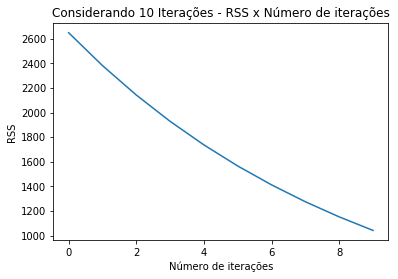

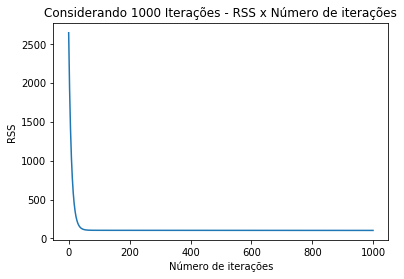

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline


import numpy as np

iterations_rss = np.genfromtxt("../datasets/iterations_rss.csv", delimiter=",", dtype=None)

x = []
y = []

for i in iterations_rss:
    x.append(i[0])
    y.append(i[1])

plt.plot(x[:10], y[:10])
plt.title('Considerando 10 Iterações - RSS x Número de iterações')
plt.xlabel('Número de iterações')
plt.ylabel('RSS')
plt.show()

plt.plot(x[:], y[:])
plt.title('Considerando 1000 Iterações - RSS x Número de iterações')
plt.xlabel('Número de iterações')
plt.ylabel('RSS')
plt.show()


## 4 - Ajustes para que w0 e w1 sejam aproximadamente iguais a -39 e 5 respectivamente

In [61]:
import numpy as np


def compute_error_for_given_points(b, m, points):
    total_error = 0

    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_error += (y - (m * x + b)) ** 2

    return total_error / float(len(points))

def step_gradient(current_b, current_m, points, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))

    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2 / N) * (y - ((current_m * x) + current_b))
        m_gradient += -(2 / N) * x * (y - ((current_m * x) + current_b))
        
#     print(learning_rate)
    new_b = current_b - (learning_rate * b_gradient)
#     print("New b = {0}".format(new_b))
    
    new_m = current_m - (learning_rate * m_gradient)
#     print("new m = {0}".format(new_m))

    
    return [new_b, new_m]

def gradient_descent_runner(points, learning_rate, starting_b, starting_m, num_iterations):
    b = starting_b
    m = starting_m

    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate)

    return [b, m]

def run():
    points = np.genfromtxt('../datasets/income.csv', delimiter=',')

    learning_rate = 0.0004
    
    # y = mx + b
    # Coeficiente linear
    # Valor esperado -39
    initial_b = 0

    # Coeficiente angular
    # Valor esperado 5
    initial_m = 0

    num_iterations = 100000
    
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".
            format(initial_b, initial_m,
            compute_error_for_given_points(initial_b, initial_m, points)))

    print("Running...")

    [b, m] = gradient_descent_runner(points, learning_rate, initial_b, initial_m, num_iterations)
    
    print("For learning rate of {0}".format(learning_rate))
    print("After {0} iterations b = {1}, m = {2}, error = {3}".
            format(num_iterations, b, m,
            compute_error_for_given_points(b, m, points)))

if __name__ == '__main__':
    run()
    

Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...
For learning rate of 0.0004
After 100000 iterations b = -38.56329233175353, m = 5.5469218100855135, error = 29.86602088022369


## 5 - Alterando o critério de parada

In [40]:
import numpy as np
import math


def compute_error_for_given_points(b, m, points):
    total_error = 0

    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_error += (y - (m * x + b)) ** 2

    return total_error / float(len(points))

def step_gradient(current_b, current_m, points, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))

    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2 / N) * (y - ((current_m * x) + current_b))
        m_gradient += -(2 / N) * x * (y - ((current_m * x) + current_b))
        
    new_b = current_b - (learning_rate * b_gradient)
    
    new_m = current_m - (learning_rate * m_gradient)

    
    return [new_b, new_m]

def gradient_descent_runner(points, learning_rate, starting_b, starting_m):
    b = starting_b
    m = starting_m
    rss = compute_error_for_given_points(b, m, points)
    iterations_norm = []
    iterations = 0
    norm = 10
    
    while(norm > 0.18):
        iterations += 1 
        b, m = step_gradient(b, m, np.array(points), learning_rate)
        norm = math.sqrt(b**2 + m**2)
        iterations_norm.append([iterations, norm])

    np.savetxt("../datasets/iterations_norm.csv", iterations_norm, delimiter=",", fmt='%i,%10.6f')
    return [b, m, iterations, norm]

def run():
    points = np.genfromtxt('../datasets/data.csv', delimiter=',')

    learning_rate = 0.0004

    # Coeficiente linear
    initial_b = 0

    # Coeficiente angular
    initial_m = 0
    
    #iterações
    num_iterations = 0
   
    print("- For dataset income.csv")
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".
            format(initial_b, initial_m,
            compute_error_for_given_points(initial_b, initial_m, points)))

    print("Running...")

    [b, m, num_iterations, norm] = gradient_descent_runner(points, learning_rate, initial_b, initial_m)

    print("After {0} iterations b = {1}, m = {2}, error = {3} and norm = {4}".
            format(num_iterations, b, m,
            compute_error_for_given_points(b, m, points), norm))

if __name__ == '__main__':
    run()
    

- For dataset income.csv
Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.0008551646958474546, m = 0.019040133005722826, error = 5425.548903532563 and norm = 0.019059327677875722


## 7 - Implemente a forma fechada (equações normais)

In [43]:
import numpy as np

points = np.genfromtxt('../datasets/data.csv', delimiter=',')
x = []
y = []

for i in points:
    x.append(i[0])
    y.append(i[1])



[[  32.50234527   31.70700585]
 [  53.42680403   68.77759598]
 [  61.53035803   62.5623823 ]
 [  47.47563963   71.54663223]
 [  59.81320787   87.23092513]
 [  55.14218841   78.21151827]
 [  52.21179669   79.64197305]
 [  39.29956669   59.17148932]
 [  48.10504169   75.3312423 ]
 [  52.55001444   71.30087989]
 [  45.41973014   55.16567715]
 [  54.35163488   82.47884676]
 [  44.1640495    62.00892325]
 [  58.16847072   75.39287043]
 [  56.72720806   81.43619216]
 [  48.95588857   60.72360244]
 [  44.68719623   82.89250373]
 [  60.29732685   97.37989686]
 [  45.61864377   48.84715332]
 [  38.81681754   56.87721319]
 [  66.18981661   83.87856466]
 [  65.41605175  118.5912173 ]
 [  47.48120861   57.25181946]
 [  41.57564262   51.39174408]
 [  51.84518691   75.38065167]
 [  59.37082201   74.76556403]
 [  57.31000344   95.45505292]
 [  63.61556125   95.22936602]
 [  46.73761941   79.05240617]
 [  50.55676015   83.43207142]
 [  52.22399609   63.35879032]
 [  35.56783005   41.4128853 ]
 [  42.4